# End-to-End Multi-Class Dog classification Project

This notebook builds an end-to-end multi-class image classifier using tensorflow and TensorFlow hub.

## 1. Problem
Idetifying the breed of a dog given an image of a Dog.

## 2. Data
The data i am using is from Kaggle's dog breed identification competition

https://www.kaggle.com/competitions/dog-breed-identification/data

## 3. Evaluation
The evaluation is a file with prediction probabilities for each dog breed of each test image.

www.kaggle.com/competitions/dog-breed-identification/overview/evaluation

## 4. Features

Information about the data:
* The provided data is in form of images (Unstructured Data). So it is appropriate to use deep learning / transfer learning.

* There are 120 breeds of dogs (this means there are 120 different classes).

* There are 10000+ images in the training set (these images have labels).

* There are around 10000+ images in the test set (these images have no labels, because we'll want to predict them).



In [ ]:
# Unzip the uploaded data into google drive
# !unzip "/content/drive/MyDrive/dog classification project/dog-breed-identification.zip" -d "drive/MyDrive/dog classification project/"

## Getting our workspace ready

* Import tensorFlow
* import TensorFlow Hub
* Make sure to use GPU

In [ ]:
# Import necessor tools
import tensorflow as tf
import tensorflow_hub as hub
print(tf.__version__, hub.__version__)

# Check for GPU availability
print("GPU Available") if tf.config.list_physical_devices("GPU") else ("GPU Unavailable")

2.15.0 0.16.1


'GPU Unavailable'

# Getting our data ready (turing into tensors)
WIth all machine learning models, our data has to be in numerical format. So, lets transform our image data into numerical data.
Let's start by accessing our data and checking out the labels

In [ ]:
# CHecking labels of our data
import pandas as pd
labels = pd.read_csv("drive/MyDrive/dog classification project/labels.csv")
labels

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever
...,...,...
10217,ffd25009d635cfd16e793503ac5edef0,borzoi
10218,ffd3f636f7f379c51ba3648a9ff8254f,dandie_dinmont
10219,ffe2ca6c940cddfee68fa3cc6c63213f,airedale
10220,ffe5f6d8e2bff356e9482a80a6e29aac,miniature_pinscher


In [ ]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10222 entries, 0 to 10221
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      10222 non-null  object
 1   breed   10222 non-null  object
dtypes: object(2)
memory usage: 159.8+ KB


<Axes: xlabel='breed'>

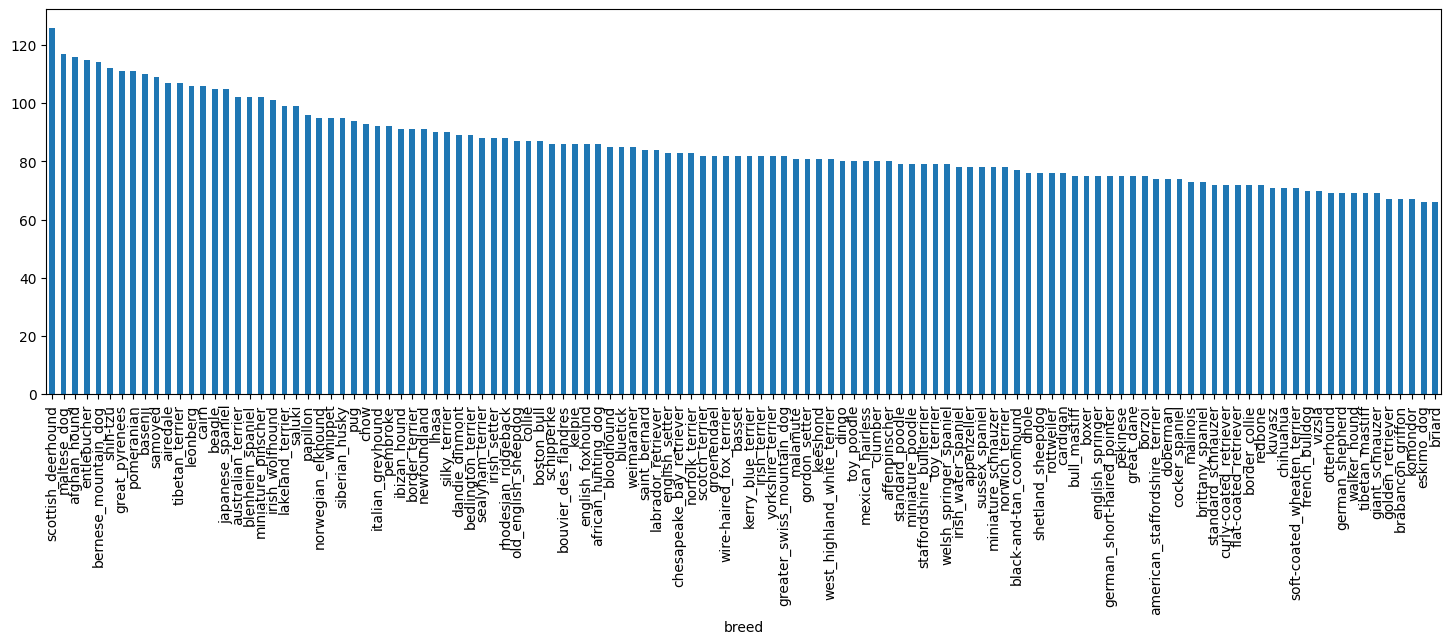

In [ ]:
labels.breed.value_counts().plot(kind = "bar", figsize = (18,5))

In [ ]:
labels.breed.value_counts().mean()

85.18333333333334

In [ ]:
lab = labels.breed.value_counts()
lab[lab >= 100]

breed
scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
shih-tzu                112
great_pyrenees          111
pomeranian              111
basenji                 110
samoyed                 109
airedale                107
tibetan_terrier         107
leonberg                106
cairn                   106
beagle                  105
japanese_spaniel        105
australian_terrier      102
blenheim_spaniel        102
miniature_pinscher      102
irish_wolfhound         101
Name: count, dtype: int64

In [ ]:
from IPython.display import Image
# Image("/content/drive/MyDrive/dog classification project/train/000bec180eb18c7604dcecc8fe0dba07.jpg")

### Getting Images and their labels

In [ ]:
filenames = [f"/content/drive/MyDrive/dog classification project/train/{name}.jpg" for name in labels.id]
# Image(filenames[7], retina=False)

In [ ]:
len(filenames)

10222

In [ ]:
import numpy as np
labels_arr = labels.breed.to_numpy()
labels_arr, len(labels_arr)

(array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
        'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object),
 10222)

In [ ]:
# See if filenames are equal to number of labels
len(labels_arr) == len(filenames)

True

In [ ]:
# Find the unique label values
unique_breeds = np.unique(labels_arr)
unique_breeds[:10], len(unique_breeds)

(array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
        'american_staffordshire_terrier', 'appenzeller',
        'australian_terrier', 'basenji', 'basset', 'beagle'], dtype=object),
 120)

In [ ]:
labels_arr[0] == unique_breeds

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [ ]:
# turn every label into a boolean array
boolean_labels = [label == unique_breeds for label in labels_arr]
len(boolean_labels)

10222

In [ ]:
# Example: Turning boolean array into integers
print(labels_arr[0]) # original label
print(np.where(unique_breeds == labels_arr[0])) # index where label occurs
print(boolean_labels[0].argmax())
print(np.array(boolean_labels[0]).astype(int))

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


## Creating validation set
Since the dataset from kaggle do not contain validation set we will create our own validation set

In [ ]:
# Setup X and y variables
X = filenames
y = boolean_labels

We are going to start off experimenting with ~1000 images and increase as needed.

In [ ]:
# Set number of images to use for experimenting
NUM_IMAGES = 10000 # @param {type: "slider", min:1000, max:10000, step:1000}

In [ ]:
# Let's split our data into train and validation sets
from sklearn.model_selection import train_test_split

np.random.seed(42)

X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES],y[:NUM_IMAGES], test_size = 0.2)

len(X_train), len(X_val), len(y_train), len(y_val)

(8000, 2000, 8000, 2000)

Let's see how to trun an image into tensors its nothing but an array form of an image

In [ ]:
from matplotlib.pyplot import imread
image = imread(filenames[0])
image.shape

(375, 500, 3)

In [ ]:
image.min(), image.max()

(0, 255)

array([[[108,  46,   0],
        [152,  92,  42],
        [180, 120,  70],
        ...,
        [176, 144,  69],
        [189, 157,  82],
        [214, 182, 107]],

       [[151,  93,  47],
        [179, 121,  75],
        [167, 111,  64],
        ...,
        [167, 136,  56],
        [172, 139,  60],
        [188, 157,  77]],

       [[151,  98,  56],
        [188, 137,  94],
        [162, 113,  70],
        ...,
        [200, 168,  81],
        [196, 162,  75],
        [200, 168,  81]],

       ...,

       [[189, 122,  69],
        [186, 119,  66],
        [183, 116,  63],
        ...,
        [213, 160, 106],
        [212, 159, 107],
        [209, 156, 102]],

       [[186, 119,  66],
        [184, 117,  64],
        [183, 116,  63],
        ...,
        [197, 145,  88],
        [199, 146,  92],
        [199, 147,  90]],

       [[182, 115,  62],
        [181, 114,  61],
        [183, 116,  63],
        ...,
        [184, 132,  74],
        [190, 138,  81],
        [192, 140,  82]]], dtype=uint8)
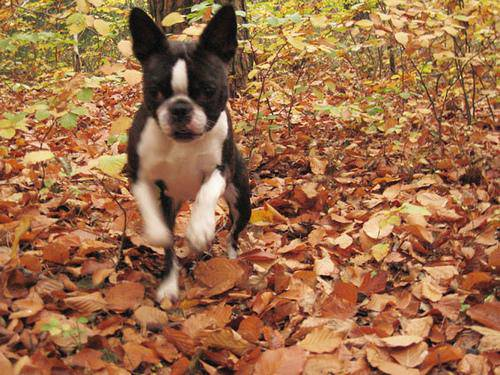

In [ ]:
image

In [ ]:
# turning image into tensors
tf.constant(image)

<tf.Tensor: shape=(375, 500, 3), dtype=uint8, numpy=
array([[[108,  46,   0],
        [152,  92,  42],
        [180, 120,  70],
        ...,
        [176, 144,  69],
        [189, 157,  82],
        [214, 182, 107]],

       [[151,  93,  47],
        [179, 121,  75],
        [167, 111,  64],
        ...,
        [167, 136,  56],
        [172, 139,  60],
        [188, 157,  77]],

       [[151,  98,  56],
        [188, 137,  94],
        [162, 113,  70],
        ...,
        [200, 168,  81],
        [196, 162,  75],
        [200, 168,  81]],

       ...,

       [[189, 122,  69],
        [186, 119,  66],
        [183, 116,  63],
        ...,
        [213, 160, 106],
        [212, 159, 107],
        [209, 156, 102]],

       [[186, 119,  66],
        [184, 117,  64],
        [183, 116,  63],
        ...,
        [197, 145,  88],
        [199, 146,  92],
        [199, 147,  90]],

       [[182, 115,  62],
        [181, 114,  61],
        [183, 116,  63],
        ...,
        [184, 132,  7

#Preprocessing Images (turning images into Tensors)

To preprocess our images into Tensors we are going to write a function which does a following tasks:

1. Take an image filepath as input
2. Use Tensorflow to read the file and save it to a variable
3. Turn that saved image (a jpg) into Tensors
4. NOrmalize our image (convert color channel values from 0-255 to 0-1)
4. Resize the image to be a shape of (224, 224)
5. Return the modified image.

In [ ]:
# Define Image Size
IMG_SIZE = 128

def process_image(image_path):
  """
  Takes an image path as argument and turns it into tensors
  """
  # Read image file
  image = tf.io.read_file(image_path)
  # Turn the jpeg image into numerical tensor with 3 color channels
  image = tf.image.decode_jpeg(image, channels =3)
  # Convert the colour channel values from 0-255 to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32)
  # Resize the image to our desired value (224, 224)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])

  return image

In [ ]:
process_image(filenames[0])

<tf.Tensor: shape=(128, 128, 3), dtype=float32, numpy=
array([[[0.6740074 , 0.4532636 , 0.27060547],
        [0.52539617, 0.35936114, 0.1418907 ],
        [0.7993593 , 0.6493626 , 0.39956775],
        ...,
        [0.9229481 , 0.7988119 , 0.5031257 ],
        [0.8521059 , 0.75917953, 0.32496482],
        [0.6653373 , 0.54363084, 0.23059466]],

       [[0.46274537, 0.304002  , 0.16158472],
        [0.83944917, 0.70882887, 0.54665506],
        [0.76630557, 0.63596195, 0.46194232],
        ...,
        [0.7566074 , 0.59171766, 0.3096711 ],
        [0.8487829 , 0.71878   , 0.3863322 ],
        [0.82624257, 0.69683075, 0.28837484]],

       [[0.58758044, 0.42171034, 0.24875107],
        [0.57108516, 0.40700734, 0.22431737],
        [0.59492147, 0.4155731 , 0.2473585 ],
        ...,
        [0.6741793 , 0.4770439 , 0.1377822 ],
        [0.7172234 , 0.56626844, 0.28007838],
        [0.8103121 , 0.65868497, 0.24385054]],

       ...,

       [[0.7371051 , 0.46936014, 0.29513466],
        [0.72

## Turning our data into batches
In order to use Tensorflow effectively, we need our data in the form of Tensor Tuples which look like this:
`(image, lable)`


In [ ]:
# Create a function to return a tuple (image, label)
def get_image_label(image_path, label):
  """
  Takes  an image path name and the associated label,
  processes the image and returns a tuple of (image, label)
  """
  image = process_image(image_path)
  return (image, label)

Now we have got our data into tuples of Tensors in the form of `(image, label)` let's make a fucntion to turn all of our data (X and y) into batches

In [ ]:
# define the batch size, 32 is a good start
BATCH_SIZE = 32

def create_data_batch(X, y = None, batch_size = BATCH_SIZE, valid_data = False, test_data = False):
  """
  Creates baches of data out of image (X) and label (y) pairs.
  Shuffles the data if it's training data but doesn't shuffle if it's validation data.
  Also accepts test data as input (no labels)
  """
  #  If the data is test dataset, we probably don't have labels
  if test_data:
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X)))
    data_batch = data.map(process_image).batch(batch_size)
    return data_batch

  elif valid_data:
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), tf.constant(y)))
    data_batch = data.map(get_image_label).batch(batch_size)
    return data_batch
  else:
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), tf.constant(y)))
    #shuffling data for training data set
    data = data.shuffle(buffer_size = len(X))
    data = data.map(get_image_label)
    data_batch = data.batch(batch_size)
  return data_batch

In [ ]:
# Create training and validation data batches
train_data = create_data_batch(X_train, y_train)
val_data = create_data_batch(X_val, y_val, valid_data = True)

In [ ]:
train_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

## Visualizing data batches

Let's visualize batch data to understand it better

In [ ]:
import matplotlib.pyplot as plt

def show_25_images(images, labels):
  """
  Displays a plot of 25 images and thier labels from a data batch.
  """

  plt.figure(figsize = (10,10))
  for i in range(25):
    ax = plt.subplot(5,5, i+1)
    plt.imshow(images[i])
    plt.title(unique_breeds[labels[i].argmax()], fontsize = 8)
    plt.axis("off")

In [ ]:
train_images, train_labels = next(train_data.as_numpy_iterator())

In [ ]:
len(train_images), len(train_labels)

(32, 32)

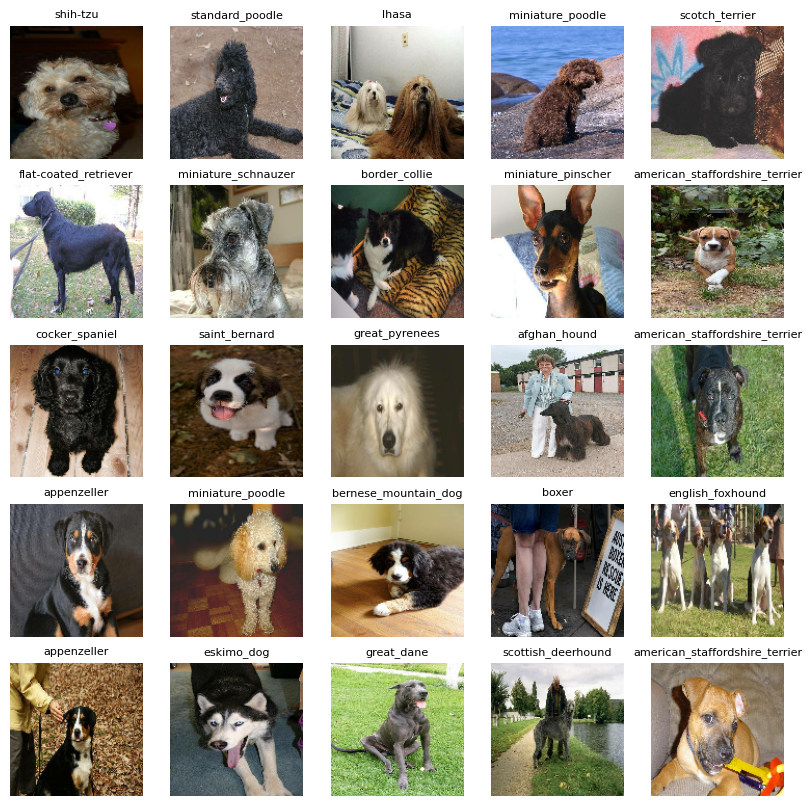

In [ ]:
show_25_images(train_images, train_labels)

# Building a model

BEfore we build a model, there are a few things we need to define:
* The input shape (our image's shape, in the form of Tensors) to our model.
* The output shape (image labels, in the form of Tensors) of our model.
*The URL of the model we want to use.

In [ ]:
# Setup input shape of the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3]

# Setup output shape of our model
OUTPUT_SHAPE = len(unique_breeds)

#Setup model URL from Tensorflow Hub
MODEL_URL = "https://www.kaggle.com/models/google/mobilenet-v2/TensorFlow2/035-128-classification/2"

Let's now create a function which:
* Takes the input shape, output shape and the model we've chosen as parameters.
* Defines the layers in a keras model in sequential fashion.
* Compiles the model (says it should be evaluated and improved).
* Builds the model (tells the model shape it'll be getting).
* Returns the model.

In [ ]:
# Creating a fucntion which builds a keras model
def create_model(input_shape = INPUT_SHAPE, output_shape = OUTPUT_SHAPE, model_url = MODEL_URL):
  print("Building model with" , model_url)

  # setup the model layers
  model = tf.keras.Sequential([
      hub.KerasLayer(model_url), # Layer 1 (input layer)
      tf.keras.layers.Dense(units = output_shape, activation="softmax") # Layer 2 (output layer)
  ])

  # Compile the model
  model.compile(
      loss = tf.keras.losses.CategoricalCrossentropy(),
      optimizer = tf.keras.optimizers.Adam(),
      metrics = ["accuracy"]
  )

  # Build the model
  model.build(input_shape)

  return model

In [ ]:
model = create_model()

Building model with https://www.kaggle.com/models/google/mobilenet-v2/TensorFlow2/035-128-classification/2


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_2 (KerasLayer)  (None, 1001)              1692489   
                                                                 
 dense_2 (Dense)             (None, 120)               120240    
                                                                 
Total params: 1812729 (6.92 MB)
Trainable params: 120240 (469.69 KB)
Non-trainable params: 1692489 (6.46 MB)
_________________________________________________________________


## Creating callbacks

Callbacks are helper fucntions a model can use during training to do such a things as save its progress, check its progress or stop training early if a model stops improving

We'll create two callbacks, one for TensorBoard which helps track our model progress and another for early stopping which prevents our model from training for too long.

### TensorBoard Callback

To setup a TensorBoard callback, we need to do 3 things:
1. Load the TensorBoard notebook extension.
2. Create a tensorBoard callback which is able to save logs to a directory and pass it to our model's fit() function.
3. Visualize our models training logs with the %tensorboard magic fucntion (we will do this after model training).

In [ ]:
# Load TensorBoard notebook extension
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [ ]:
import datetime
import os

# create a function to build a TensorBoard callback
def create_tensorboard_callback():
  # Create a directory for storing TensorBaord logs
  logdir = os.path.join("/content/drive/MyDrive/dog classification project/logs",
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)

### Early stopping Callback

Early stopping helps stop our model from overfitting by stopping training if a certain evaluation metric stops improving.

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                   patience=3)

## Training a model (on subset of data)

Our first model is only going to train on 1000 images, to make sure everything is working.

In [ ]:
NUM_EPOCHS = 100 # @param {type:"slider", min:10, max:100, steps:10}

## Lets create a function which trains a model.

* Create a model using create_model().
* Setup a TensorBaord callback using create_tensorboard_callback().
* Call the fit() function on our model passing in the training data, validataion data, number of epochs to train for (NUM_EPOCHS) and the callback we had like to use.
* Return the model

In [ ]:
# Build a fucntion to train and retrun a trained model
def train_model():
  """
  train given model and returns the trainied version.
  """

  # create a model
  model = create_model()

  # Create a TensorflowBaord session everytime we train a model
  tensorboard = create_tensorboard_callback()

  # fill the model to the data passing it the
  model.fit(x = train_data, epochs  = NUM_EPOCHS, validation_data = val_data,
            validation_freq=1, callbacks = [tensorboard, early_stopping])

  return model

In [ ]:
# fit the model to the data
model = train_model()

Building model with https://www.kaggle.com/models/google/mobilenet-v2/TensorFlow2/035-128-classification/2
Epoch 1/100
250/250 [==============================] - 925s 4s/step - loss: 3.0600 - accuracy: 0.2959 - val_loss: 2.3793 - val_accuracy: 0.3975
Epoch 2/100
250/250 [==============================] - 83s 330ms/step - loss: 1.6360 - accuracy: 0.5535 - val_loss: 2.3090 - val_accuracy: 0.4175
Epoch 3/100
250/250 [==============================] - 77s 307ms/step - loss: 1.2228 - accuracy: 0.6499 - val_loss: 2.3295 - val_accuracy: 0.4335
Epoch 4/100
250/250 [==============================] - 77s 308ms/step - loss: 0.9421 - accuracy: 0.7279 - val_loss: 2.4141 - val_accuracy: 0.4280
Epoch 5/100
250/250 [==============================] - 82s 329ms/step - loss: 0.7511 - accuracy: 0.7810 - val_loss: 2.4422 - val_accuracy: 0.4400
Epoch 6/100
250/250 [==============================] - 83s 331ms/step - loss: 0.6027 - accuracy: 0.8382 - val_loss: 2.5248 - val_accuracy: 0.4370
Epoch 7/100
250/250

### Checking the tesnsorboard

The Tensorboard magic function (`%tensorboard`) will access the logs directory  we created earlier and visualize contents

In [ ]:
# %tensorboard --logdir "drive/MyDrive/dog classification project/logs"

## Making and evaluating predictions using a trained model

In [ ]:
# Making predictions on the validation data
predictions = model.predict(val_data, verbose=1)
predictions

63/63 [==============================] - 16s 244ms/step


array([[7.03663516e-12, 1.27423141e-10, 2.91341257e-11, ...,
        1.32737966e-07, 1.00448460e-05, 7.11003062e-11],
       [3.65841668e-09, 2.51388684e-07, 8.48282798e-06, ...,
        1.67767649e-08, 6.50575676e-05, 1.22110952e-08],
       [8.67139170e-05, 1.59377777e-07, 2.29177877e-09, ...,
        4.15362287e-08, 1.29086664e-03, 1.34405527e-05],
       ...,
       [5.43793840e-06, 2.43879804e-05, 2.55879051e-08, ...,
        5.83582550e-06, 1.32005935e-05, 1.44416187e-02],
       [3.68120219e-08, 3.51258578e-09, 1.43501193e-08, ...,
        1.37053858e-05, 2.31990870e-02, 6.68876776e-09],
       [2.37192850e-07, 1.13875105e-03, 2.52034571e-09, ...,
        6.92003709e-07, 5.86139095e-06, 2.66881784e-07]], dtype=float32)

In [ ]:
predictions.shape

(2000, 120)

In [ ]:
sorted = np.array(predictions[0])
np.sort(sorted)[-2]

0.014497689

In [ ]:
# First Predictions
ind = 189
print(max(predictions[ind]))
print(np.argmax(predictions[ind]))
print(unique_breeds[np.argmax(predictions[ind])])

0.41983843
42
entlebucher


It would be even better if we could see the image the predictions is being made on

**Note**: Predictions probabilities are also known as confidence levels

In [ ]:
#turn predictions probabilities into thier respective label
def get_pred_label(prediction_probabilities):

  return unique_breeds[np.argmax(prediction_probabilities)]

In [ ]:
get_pred_label(predictions[42])

'kelpie'

Now since our validation data is still in a batch dataset.

we'll have to unbatch it to make predictions on the validation images and then compare those predictions to the validation labels

In [ ]:
images_unbatch = []
labels_unbatch = []

for image, label in val_data.unbatch().as_numpy_iterator():
  images_unbatch.append(image)
  labels_unbatch.append(label)

In [ ]:
get_pred_label(predictions[12])

'otterhound'

In [ ]:
get_pred_label(labels_unbatch[12])

'otterhound'

Let's create some functions to make predictions more visiual
We'll create a function which:
* Takes an array of prediction probabalities, an array of truth labels and an array of images and integers.
* Convert the predicted probabilities to a predicted label.
* Plot the predicted label, its predicted probability, the truth label and the target image on a single plot.

In [ ]:
def plot_pred(prediction_probabilities, labels, images, n =1):

  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]

  # get the pred label
  pred_label = get_pred_label(pred_prob)

  # plot_image
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  if pred_label == get_pred_label(true_label):
    color = "green"
  else:
    color = "red"

  plt.title(f"{pred_label} {np.max(pred_prob*100):2.0f}% {get_pred_label(true_label)}", color = color)

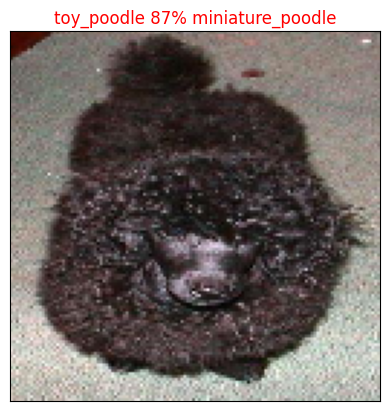

In [ ]:
plot_pred(predictions, labels_unbatch, images_unbatch, n = 9)

Let's create a function to visualize top 10 predictions of the model

In [ ]:
def plot_top_ten(prediction_probabilities, labels, n =1):

  pred_prob, true_label = prediction_probabilities[n], get_pred_label(labels[n])

  # get the predicted label
  pred_label = get_pred_label(pred_prob)

  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]

  # find the top 10 prediction confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]

  # find the top 10 prediction labels
  top_10_pred_labels = unique_breeds[top_10_pred_indexes]

  # Setup plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                     top_10_pred_values,
                     color = "grey")

  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels = top_10_pred_labels,
             rotation = "vertical")
  # change color of true label
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass

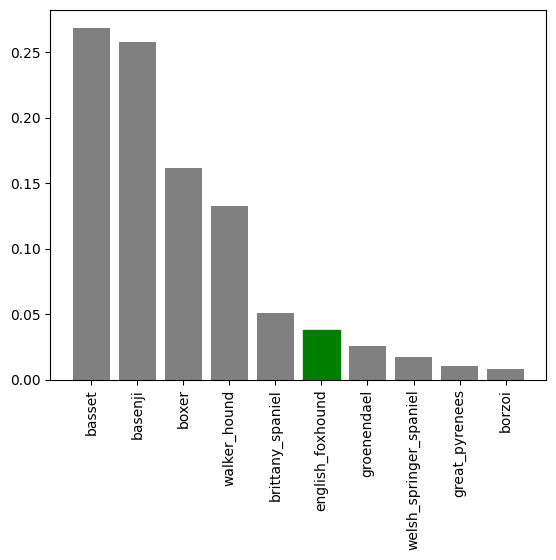

In [ ]:
plot_top_ten(predictions, labels_unbatch, n = 97)

In [ ]:
# Saving and relaoding a trained model

In [ ]:
def save_model(model, suffix = None):
  # create a model directory pathname with current time
  modeldir = os.path.join("/content/drive/MyDrive/dog classification project/models",
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
  model_path = modeldir + "-" + suffix + ".h5" # save format of model
  print(f"Saveing model to: {model_path}...")
  model.save(model_path)
  return model_path

In [ ]:
# function to laod the model
def load_model(model_path):
  print(f"laoding saved model from: {model_path}")
  model = tf.keras.models.load_model(model_path, custom_objects={"KerasLayer": hub.KerasLayer})
  return model

In [ ]:
# saving model 3000 images
save_model(model, suffix="10000-images-training")

Saveing model to: /content/drive/MyDrive/dog classification project/models/20240414-11221713093753-10000-images-training.h5...


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


'/content/drive/MyDrive/dog classification project/models/20240414-11221713093753-10000-images-training.h5'

In [ ]:
# laod a trained model
loaded_model = load_model("/content/drive/MyDrive/dog classification project/models/20240414-10341713090843-3000-images-training.h5")

laoding saved model from: /content/drive/MyDrive/dog classification project/models/20240414-10341713090843-3000-images-training.h5


In [ ]:
model.evaluate(val_data)

63/63 [==============================] - 16s 248ms/step - loss: 2.7960 - accuracy: 0.4375


[2.795973539352417, 0.4375]

In [ ]:
loaded_model.evaluate(val_data)

63/63 [==============================] - 16s 245ms/step - loss: 2.0886 - accuracy: 0.5340


[2.0885865688323975, 0.5339999794960022]

## Training model on full data